# Ejemplo uso CLIP de HaggingFace

In [1]:
from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

In [2]:
# Leemos el modelo
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

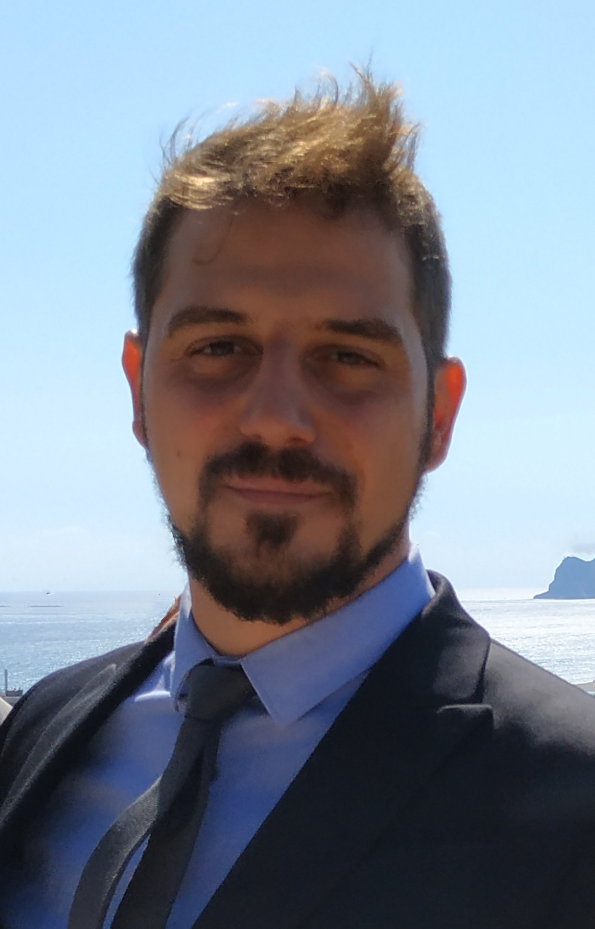

In [3]:
# Leemos la imagen
# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
url = "https://www.uv.es/lapeva/Valero_2022.png"

image = Image.open(requests.get(url, stream=True).raw)

image

In [41]:
# Definimos el Texto
#prompt1 = "a photo of a cat"
#prompt2 = "a photo of a dog"

prompt1 = "photo human tie"
prompt2 = "a photo of a human with a tie and a black suit, there is a blue sky in the background"
prompt3 = "a photo of a human with a tie and a black suit, there is a blue sky in the front"

inputs = processor(text=[prompt1, prompt2, prompt3], images=image, return_tensors="pt", padding=True)


In [42]:
#inputs

In [43]:
# Aplicamos el modelo

outputs = model(**inputs)

In [44]:
# Resultados

logits_per_image = outputs.logits_per_image # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities

In [45]:
logits_per_image

tensor([[22.4980, 27.5210, 26.7735]], grad_fn=<TBackward0>)